In [44]:
import pandas as pd

data=pd.read_csv('Kobe_bryant.csv')

print('Original features length',len(data.columns))


Original features length 25


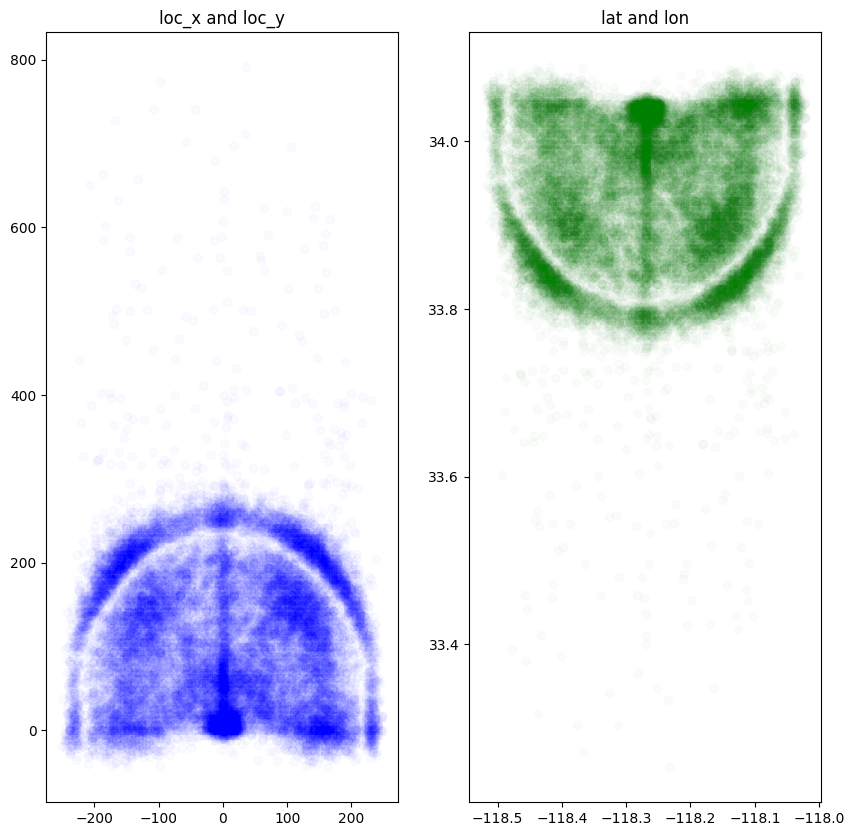

In [45]:
import matplotlib.pyplot as plt

alpha=0.02
plt.figure(figsize=(10,10))

#loc_x and loc_y
plt.subplot(121)
plt.scatter(data.loc_x,data.loc_y,color='blue',alpha=alpha)
plt.title('loc_x and loc_y')

#lat and lon
plt.subplot(122)
plt.scatter(data.lon,data.lat,color='green',alpha=alpha)
plt.title('lat and lon')

plt.show()

In [47]:
#we get the shape of a basketball court. The top and botton "D"
#Lets change them into polar cordinates for better analysis
import numpy as np
data['dist']= np.sqrt(data['loc_x']**2+ data['loc_y']**2)
loc_x_zero = data['loc_x'] ==0
data['angle']= np.array([0]*len(data))
data['angle'][~loc_x_zero]= np.arctan(data['loc_y'] [~loc_x_zero] / data['loc_x'] [~loc_x_zero])
data['angle'] [loc_x_zero]= np.pi / 2
#with these new columns, we don not need the old Lat and Long columns



<ipython-input-47-a033fb3ace0e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['angle'][~loc_x_zero]= np.arctan(data['loc_y'] [~loc_x_zero] / data['loc_x'] [~loc_x_zero])
<ipython-input-47-a033fb3ace0e>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.40705785 -0.         -0.92848146 ... -0.89166303  1.45520899
  1.55690833]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data['angle'][~loc_x_zero]= np.arctan(data['loc_y'] [~loc_x_zero] / data['loc_x'] [~loc_x_zero])


In [25]:
#Lets combine our remaining minutes and seconds columns into one
data['remaining_time'] = data['minutes_remaining']*60+ data['seconds_remaining']
data

,action_type,combined_shot_type,game_event_id,game_id,lat,lon,period,playoffs,season,shot_distance,...,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,dist,angle,remaining_time
0,Jump Shot,Jump Shot,10,20000012,33.9723,-118.1028,1,0,2000-01,18,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,181.859836,0.407058,627
1,Jump Shot,Jump Shot,12,20000012,34.0443,-118.4268,1,0,2000-01,15,...,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,157.000000,-0.000000,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-118.3708,1,0,2000-01,16,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,168.600119,-0.928481,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,-118.1318,1,0,2000-01,22,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,222.865430,0.903063,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,-118.2698,2,0,2000-01,0,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.000000,1.570796,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,-118.2688,4,1,1999-00,4,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693,48.010416,1.549966,365
30693,Tip Shot,Tip Shot,398,49900088,34.0443,-118.2698,4,1,1999-00,0,...,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694,0.000000,1.570796,365
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-118.4038,4,1,1999-00,21,...,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695,213.335417,-0.891663,208
30695,Jump Shot,Jump Shot,448,49900088,33.7773,-118.2388,4,1,1999-00,26,...,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696,268.793601,1.455209,130


In [48]:
#They are regions of the court, But we have already stored this info in angle and dist columns
#now Let's drop the useless columns
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic',
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining',
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    data = data.drop(drop, axis=1)



#With Feature Selection

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data = pd.read_csv('Kobe_bryant.csv')

# Feature engineering
data['dist'] = np.sqrt(data['loc_x']**2 + data['loc_y']**2)
loc_x_zero = data['loc_x'] == 0
data['angle'] = np.where(loc_x_zero, np.pi / 2, np.arctan(data['loc_y'] / data['loc_x']))
data['remaining_time'] = data['minutes_remaining'] * 60 + data['seconds_remaining']

# Drop unnecessary columns
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic',
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining',
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
data = data.drop(drops, axis=1)

# Separate features and target
X = data.drop('shot_made_flag', axis=1)
y = data['shot_made_flag']

# Handle missing values in features and target
X.fillna(0, inplace=True)
y.dropna(inplace=True)  # Drop rows where target is NaN

# Ensure X and y have the same index
X = X.loc[y.index]

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
# print('Confusion Matrix:')
# print(conf_matrix)
# print('Classification Report:')
# print(class_report)


Accuracy: 0.66


In [56]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72      2887
         1.0       0.65      0.50      0.56      2253

    accuracy                           0.66      5140
   macro avg       0.66      0.64      0.64      5140
weighted avg       0.66      0.66      0.65      5140



#Without Feature Selection

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data = pd.read_csv('Kobe_bryant.csv')

# Drop unnecessary columns (keep all features for this task)
drops = ['shot_id', 'team_id', 'team_name', 'game_event_id', 'game_id', 'game_date']
data = data.drop(drops, axis=1)

# Handle missing values
data.fillna(0, inplace=True)

# Separate features and target
X = data.drop('shot_made_flag', axis=1)
y = data['shot_made_flag']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.68
Confusion Matrix:
[[3320  470]
 [1508  842]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77      3790
         1.0       0.64      0.36      0.46      2350

    accuracy                           0.68      6140
   macro avg       0.66      0.62      0.62      6140
weighted avg       0.67      0.68      0.65      6140

